In [5]:
from tensorflow.keras.layers import  Input,Dense,Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization,LeakyReLU
from tensorflow.keras.models import  Sequential
from tensorflow.keras.datasets import  fashion_mnist
import matplotlib.pyplot as  plt
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint


In [6]:
# load the fashio mnist datasets
data = fashion_mnist.load_data()

In [7]:
# split the data into training and testing datasets
(train_images, train_labels), (test_images, test_labels) = data

In [8]:
#normalize the data
train_images = train_images / 255.0
test_images = test_images / 255.0


In [9]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

{'activation': 'leaky_relu',
 'optimizer': 'adam',
 'learning_rate': 0.0005264363579822869,
 'momentum': 0.0,
 'alpha': 0.16929982827406403}

In [10]:
def create_model():
    alpha = 0.16929982827406403
    model = Sequential([
        Input(shape=(28, 28, 1)),
        Conv2D(32, (3, 3), activation=LeakyReLU(alpha=alpha), padding='same',name="conv1"),
        # MaxPooling2D((2, 2)),
        BatchNormalization(),
        Conv2D(64, (3, 3), activation=LeakyReLU(alpha=alpha), padding='same',name="conv2"),
        MaxPooling2D((2, 2)),
        BatchNormalization(),
        Conv2D(128, (3, 3), activation=LeakyReLU(alpha=alpha), padding='same',name="conv3"),
        MaxPooling2D((2, 2)),
        BatchNormalization(),
        Conv2D(256, (3, 3), activation=LeakyReLU(alpha=alpha), padding='same',name="conv4"),
        MaxPooling2D((2, 2)),
        BatchNormalization(),
        Flatten(),
        Dense(128, activation=LeakyReLU(alpha=alpha)),
        Dropout(0.5),
        Dense(10, activation='softmax')
    ])

    return model

In [11]:
model = create_model()
model.compile(optimizer=Adam(learning_rate=0.0005264363579822869),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

/home/safal/pattern_recognition/tf_gpu/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(
I0000 00:00:1745768479.000455    1129 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 14, 14, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv2D)                  │ (None, 7, 7, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 3, 3, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 686,090 (2.62 MB)

 Trainable params: 685,130 (2.61 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
# add the checkpoint and early stopping callbacks
checkpoint = ModelCheckpoint(
    filepath='best_model.h5',
    save_best_only=True,
    monitor='val_loss',
    mode='min'
)
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

In [14]:
# fit the model 
history = model.fit(train_images, train_labels, epochs=50, batch_size=64,
                    validation_split=0.2,
                    callbacks=[checkpoint, early_stopping])

Epoch 1/50


I0000 00:00:1745768483.823928    1806 service.cc:152] XLA service 0x7fa4d0002880 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1745768483.823969    1806 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-04-27 15:41:23.886097: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1745768484.218023    1806 cuda_dnn.cc:529] Loaded cuDNN version 90300


  4/750 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.2256 - loss: 2.7215  

2025-04-27 15:41:30.537476: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'input_reduce_transpose_fusion', 132 bytes spill stores, 120 bytes spill loads

I0000 00:00:1745768490.576602    1806 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7806 - loss: 0.6483

750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - accuracy: 0.7807 - loss: 0.6481 - val_accuracy: 0.8876 - val_loss: 0.3214
Epoch 2/50
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8868 - loss: 0.3183

750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8868 - loss: 0.3183 - val_accuracy: 0.9029 - val_loss: 0.2806
Epoch 3/50
746/750 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9084 - loss: 0.2493

750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9085 - loss: 0.2493 - val_accuracy: 0.9133 - val_loss: 0.2387
Epoch 4/50
748/750 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9248 - loss: 0.2055

750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9248 - loss: 0.2055 - val_accuracy: 0.9164 - val_loss: 0.2365
Epoch 5/50
747/750 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9384 - loss: 0.1739

750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9383 - loss: 0.1739 - val_accuracy: 0.9209 - val_loss: 0.2198
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9469 - loss: 0.1402 - val_accuracy: 0.9231 - val_loss: 0.2414
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.9555 - loss: 0.1185 - val_accuracy: 0.9274 - val_loss: 0.2272
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.9654 - loss: 0.0935 - val_accuracy: 0.9195 - val_loss: 0.2663
Epoch 9/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.9711 - loss: 0.0814 - val_accuracy: 0.9212 - val_loss: 0.2824
Epoch 10/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 16s 21ms/step - accuracy: 0.9753 - loss: 0.0669 - val_accuracy: 0.9166 - val_loss: 0.3109


In [15]:
# get the validation loss and accuracy
history = model.history.history
val_loss = history['val_loss']
val_accuracy = history['val_accuracy']
# get the training loss and accuracy
train_loss = history['loss']
train_accuracy = history['accuracy']


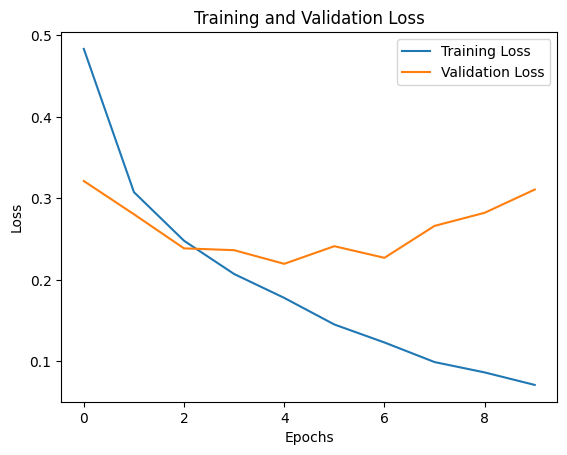

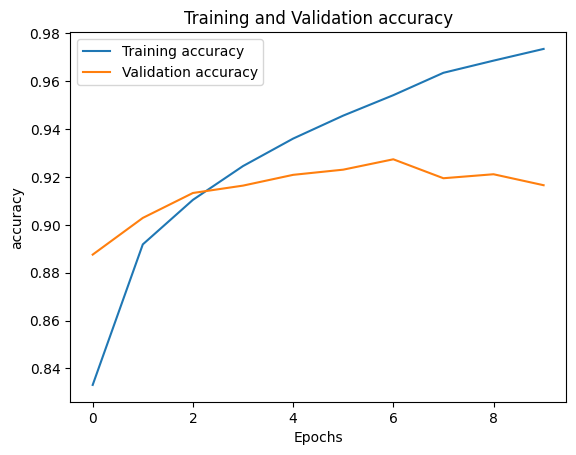

In [16]:
def plot_loss(history):
    # plot the training and validation loss
    plt.plot(history['loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def plot_accuracy(history):
    plt.plot(history['accuracy'], label='Training accuracy')
    plt.plot(history['val_accuracy'], label='Validation accuracy')
    plt.title('Training and Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()


plot_loss(history)
plot_accuracy(history)

In [17]:
dummpy_inputs = tf.random.normal(shape=(1, 28, 28, 1))
model(dummpy_inputs)

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[2.3613063e-16, 4.5170978e-05, 2.4072260e-24, 1.5216075e-20,
        3.6805289e-28, 2.4760243e-09, 7.0020694e-15, 1.9311206e-23,
        9.9995482e-01, 6.8531898e-14]], dtype=float32)>

In [18]:
# evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9111 - loss: 0.2506
Test accuracy: 0.9125000238418579


In [19]:
# predict the test dataset
predictions = model.predict(test_images)
predictions.shape

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


(10000, 10)

In [20]:
import tensorflow as tf
confusion_matrix = tf.math.confusion_matrix(test_labels, tf.argmax(predictions, axis=1))


<Axes: >

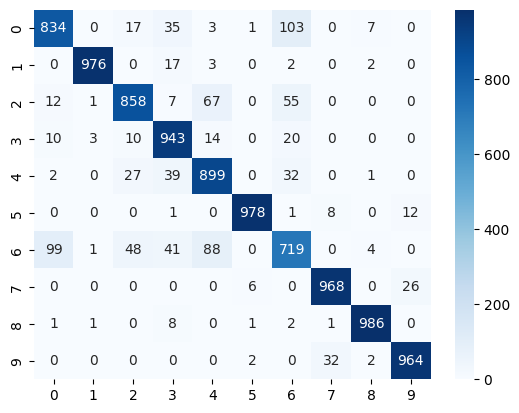

In [21]:
import seaborn as sns

sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')

In [22]:
# first conv layer
new_model = tf.keras.Model(inputs=model.layers[0].input, outputs=model.layers[0].output)

In [23]:
# predict on the first 10 images
activations = new_model.predict(test_images[0:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


In [24]:
def visualize_extracted_features(activation, layer_name, max_filters=6):
    print(f"{layer_name} activation shape: {activation.shape}")  # Debug info
    fig, axes = plt.subplots(1, max_filters, figsize=(20, 5))
    fig.suptitle(f'Feature maps from {layer_name}', fontsize=16)

    for i in range(max_filters):
        ax = axes[i]
        
        try:
            if activation.ndim == 4:  # (batch, height, width, channels)
                ax.imshow(activation[0, :, :, i], cmap='grey')
            elif activation.ndim == 3:  # (height, width, channels)
                ax.imshow(activation[:, :, i], cmap='grey')
            elif activation.ndim == 2:  # (channels, features)
                ax.imshow(activation[i, :].reshape(1, -1), cmap='grey')
            else:
                ax.text(0.5, 0.5, 'Unsupported shape', ha='center')
        except IndexError:
            ax.text(0.5, 0.5, f'Index {i} out of bounds', ha='center')

        ax.axis('off')
    
    plt.tight_layout()
    plt.show()


conv1 activation shape: (28, 28, 32)


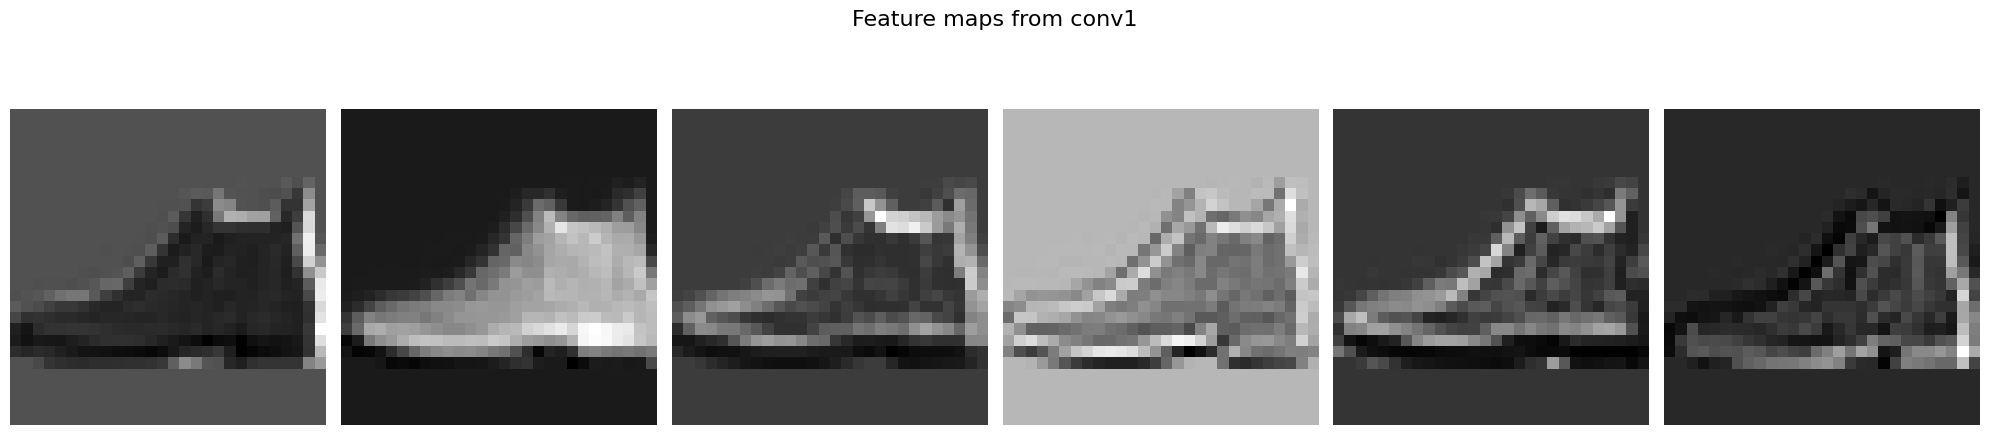

In [25]:
for layer_activation, layer in zip(activations, model.layers):
    visualize_extracted_features(layer_activation, layer.name, max_filters=6)


In [26]:

# Create a new model that outputs the activations of the conv2 layers
conv2_model = tf.keras.Model(inputs=model.layers[0].input, outputs=[layer.output for layer in model.layers if 'conv2' in layer.name])

In [27]:
conv2_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 28, 28, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 28, 28, 64)     │        18,496 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,944 (74.00 KB)

 Trainable params: 18,880 (73.75 KB)

 Non-trainable params: 64 (256.00 B)

In [28]:
# predict on the first 10 images
activations_2 = conv2_model.predict(test_images[0:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


input_layer activation shape: (28, 28, 64)


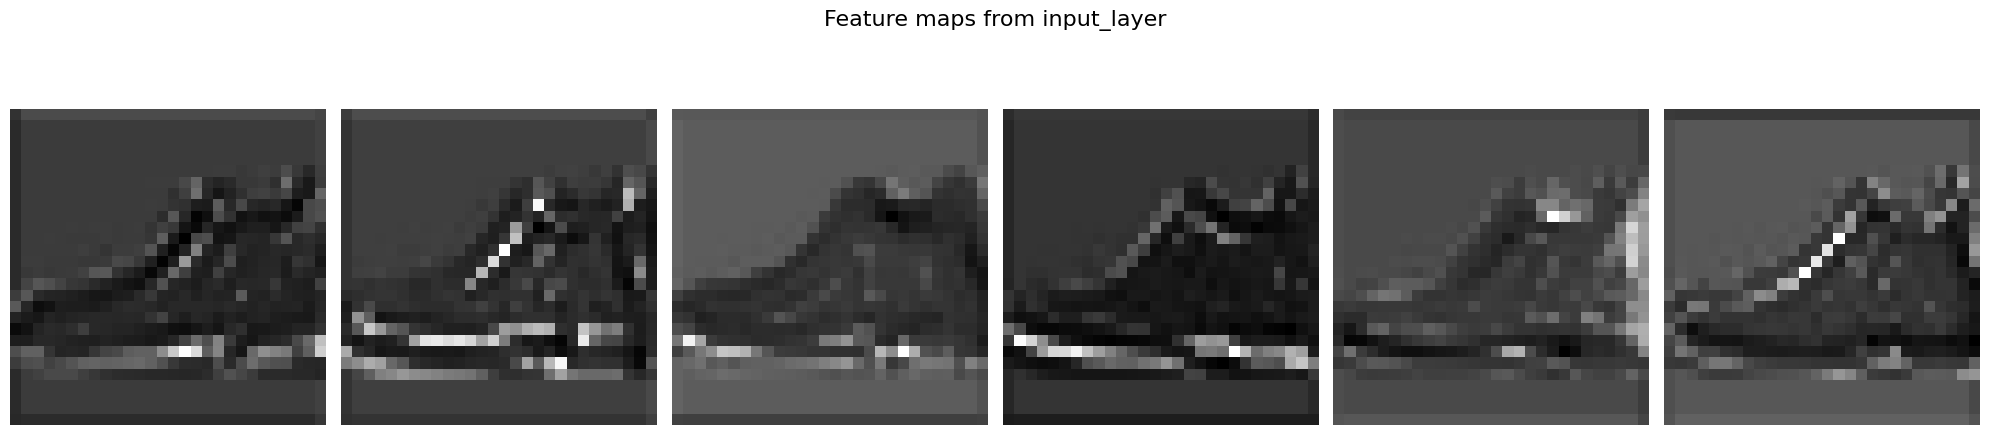

In [29]:
for layer_activation, layer in zip(activations_2, conv2_model.layers):
        visualize_extracted_features(layer_activation, layer.name, max_filters=6)
